## Reuter News

In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt

### 로이터 기사 데이터셋을 로딩

In [2]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

In [3]:
train_data.shape

(8982,)

In [4]:
word_index = reuters.get_word_index()
reverse_word_index = dict( [value, key] for (key, value) in word_index.items() )

decoded_newswire = ' '.join( [reverse_word_index.get(i-3, '?') for i in train_data[0]])

In [5]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [6]:
train_labels[0]

3

### 데이터의 준비

In [7]:
def vectorize_sequences(sequences, dimension=10000):

  results = np.zeros((len(sequences),dimension))

  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1

  return results

### 데이터의 변환

In [8]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25], dtype=int64)

### 라벨 데이터의 엔코딩 (보여주러고 한것, 실제로는 X)

In [10]:
def to_one_hot(labels, dimension= 46):
    results = np.zeros((len(labels), dimension))
    
    for i, sequence in enumerate(labels):
        results[i, sequence] = 1
        
        return results
    
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels  = to_one_hot(test_labels)

### Categorical 데이터로 변환 ( 실제로는 O )

In [11]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels  = to_categorical(test_labels)

### 신경망 구성

In [20]:
from keras import models 
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1000, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                640064    
                                                                 
 dense_4 (Dense)             (None, 1000)              65000     
                                                                 
 dense_5 (Dense)             (None, 46)                46046     
                                                                 
Total params: 751,110
Trainable params: 751,110
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(optimizer='rmsprop',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

#### 훈련 데이터의 준비

In [23]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [24]:
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 42ms/step - loss: 2.1625 - accuracy: 0.5258 - val_loss: 1.4362 - val_accuracy: 0.6650
Epoch 2/20
16/16 [==============================] - 0s 24ms/step - loss: 1.2270 - accuracy: 0.7160 - val_loss: 1.2017 - val_accuracy: 0.7170
Epoch 3/20
16/16 [==============================] - 0s 26ms/step - loss: 0.9147 - accuracy: 0.7902 - val_loss: 1.0899 - val_accuracy: 0.7590
Epoch 4/20
16/16 [==============================] - 0s 25ms/step - loss: 0.6888 - accuracy: 0.8343 - val_loss: 1.0919 - val_accuracy: 0.7440
Epoch 5/20
16/16 [==============================] - 0s 25ms/step - loss: 0.5382 - accuracy: 0.8706 - val_loss: 0.9608 - val_accuracy: 0.7930
Epoch 6/20
16/16 [==============================] - 0s 24ms/step - loss: 0.4087 - accuracy: 0.9045 - val_loss: 0.9542 - val_accuracy: 0.8030
Epoch 7/20
16/16 [==============================] - 0s 23ms/step - loss: 0.3154 - accuracy: 0.9272 - val_loss: 1.0079 - val_accuracy: 0.8030
Epoch 8/20
16

### 학습 결과

In [25]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(loss) + 1)

### 결과를 시각화

C:\Users\user\AppData\Local\Temp\ipykernel_9636\2499279012.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_loss, 'b-', label= 'Validation Loss', c= 'red')


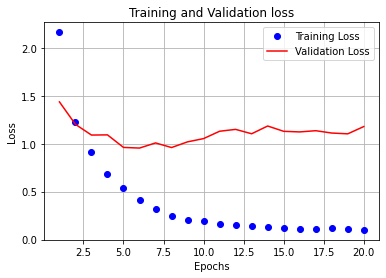

In [26]:
plt.plot(epochs, loss,     'bo', label= 'Training Loss')
plt.plot(epochs, val_loss, 'b-', label= 'Validation Loss', c= 'red')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.grid()

C:\Users\user\AppData\Local\Temp\ipykernel_9636\1480533608.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-', label= 'Validation Accuracy', c= 'red')


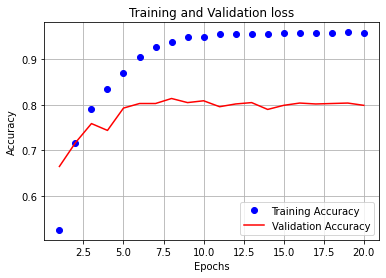

In [27]:
plt.plot(epochs, acc,     'bo', label= 'Training Accuracy')
plt.plot(epochs, val_acc, 'b-', label= 'Validation Accuracy', c= 'red')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()
plt.grid()